# Models Tuning

This notebook was run in VScode to view GridSearchCV progress ([ref](https://www.kaggle.com/questions-and-answers/319408)).

Enable auto-reloading of external modules

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

Import dependencies

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../..")

print('Current location: ', os.getcwd())

Current location:  /home/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


In [4]:
import matplotlib
import matplotlib.pyplot as plt
from pprint import pprint

from source.custom_classes.data_loaders import CompasWithoutSensitiveAttrsDataset
from source.utils.model_tuning_utils import test_baseline_models

plt.style.use('mpl20')
matplotlib.rcParams['figure.dpi'] = 100

In [5]:
try:
    from folktables import ACSDataSource, ACSEmployment
except:
    !pip install folktables
    from folktables import ACSDataSource, ACSEmployment

In [6]:
DATASET_NAME = "COMPAS_Without_Sensitive_Attributes"

## Loading ACSEmployment data

In [7]:
dataset = CompasWithoutSensitiveAttrsDataset("./data/COMPAS.csv")

## Tune hyper-parameters and find the best baseline model

Baseline X_train shape:  (4222, 9)
Baseline X_test shape:  (1056, 9)
X_train_features.columns:  Index(['age_cat_Greater than 45_0', 'priors_count',
       'age_cat_Greater than 45_1', 'age_cat_25 - 45_1', 'c_charge_degree_M_1',
       'juv_fel_count', 'age_cat_Less than 25_1', 'c_charge_degree_F_0',
       'c_charge_degree_F_1', 'juv_other_count', 'age_cat_Less than 25_0',
       'juv_misd_count', 'age_cat_25 - 45_0', 'c_charge_degree_M_0'],
      dtype='object')
2023/01/24, 01:17:07: Tuning DecisionTreeClassifier...
Fitting 3 folds for each of 80 candidates, totalling 240 fits
[CV 3/3; 2/80] START criterion=gini, max_depth=2, max_features=0.6, min_samples_split=0.02
[CV 3/3; 2/80] END criterion=gini, max_depth=2, max_features=0.6, min_samples_split=0.02; Accuracy_Score: (test=0.568) F1_Score: (test=0.458) total time=   0.0s
[CV 3/3; 4/80] START criterion=gini, max_depth=2, max_features=0.6, min_samples_split=0.1
[CV 3/3; 4/80] END criterion=gini, max_depth=2, max_features=0.6, min_sam

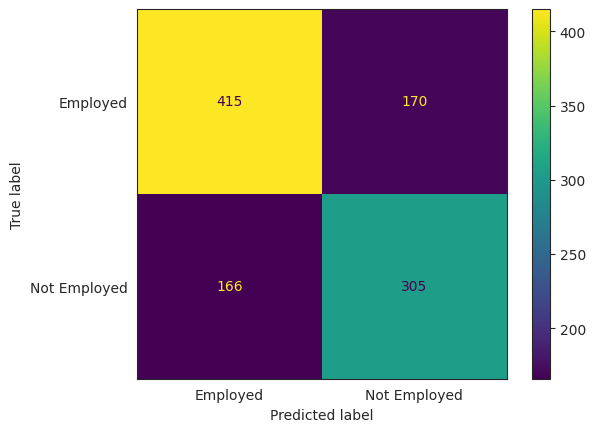

2023/01/24, 01:17:09: Tuning KNeighborsClassifier...
Fitting 3 folds for each of 42 candidates, totalling 126 fits
[CV 1/3; 3/80] START criterion=gini, max_depth=2, max_features=0.6, min_samples_split=0.05
[CV 1/3; 3/80] END criterion=gini, max_depth=2, max_features=0.6, min_samples_split=0.05; Accuracy_Score: (test=0.567) F1_Score: (test=0.455) total time=   0.1s
[CV 3/3; 3/80] START criterion=gini, max_depth=2, max_features=0.6, min_samples_split=0.05
[CV 3/3; 3/80] END criterion=gini, max_depth=2, max_features=0.6, min_samples_split=0.05; Accuracy_Score: (test=0.568) F1_Score: (test=0.458) total time=   0.0s
[CV 1/3; 4/80] START criterion=gini, max_depth=2, max_features=0.6, min_samples_split=0.1
[CV 1/3; 4/80] END criterion=gini, max_depth=2, max_features=0.6, min_samples_split=0.1; Accuracy_Score: (test=0.567) F1_Score: (test=0.455) total time=   0.0s
[CV 1/3; 5/80] START criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=0.01
[CV 1/3; 5/80] END criterion=gini, max_

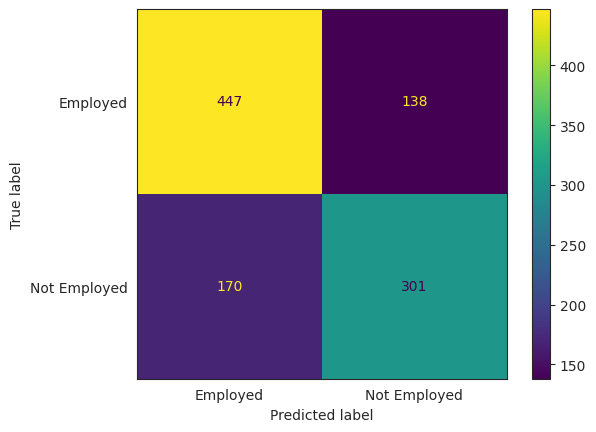

,Dataset_Name,Model_Name,F1_Score,Accuracy_Score,Model_Best_Params
0,COMPAS_Without_Sensitive_Attributes,DecisionTreeClassifier,0.678328,0.681818,"{'criterion': 'gini', 'max_depth': 20, 'max_fe..."
1,COMPAS_Without_Sensitive_Attributes,KNeighborsClassifier,0.702649,0.708333,"{'metric': 'minkowski', 'n_neighbors': 25, 'we..."


In [8]:
ML_baseline_results_df, best_results_df = test_baseline_models(dataset, dataset_name=DATASET_NAME)
ML_baseline_results_df

In [9]:
best_results_df

,Dataset_Name,Model_Name,F1_Score,Accuracy_Score,Model_Best_Params,Model_Pred
0,COMPAS_Without_Sensitive_Attributes,KNeighborsClassifier,0.702649,0.708333,"{'metric': 'minkowski', 'n_neighbors': 25, 'we...","[1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."


In [10]:
for index, row in ML_baseline_results_df.iterrows():
    print(f'\n\nModel name: {row["Model_Name"]}')
    pprint(row['Model_Best_Params'])



Model name: DecisionTreeClassifier
{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 0.6,
 'min_samples_split': 0.1}


Model name: KNeighborsClassifier
{'metric': 'minkowski', 'n_neighbors': 25, 'weights': 'uniform'}


In [11]:
from datetime import datetime, timezone

now = datetime.now(timezone.utc)
date_time_str = now.strftime("%Y%m%d__%H%M%S")
ML_baseline_results_df.to_csv(os.path.join('results', 'models_tuning', f'tuning_results_{DATASET_NAME}_{date_time_str}.csv'),
                              sep=",", index=False, columns=ML_baseline_results_df.columns, float_format="%.4f")